# Descriptores de textura

Tanto OpenCV como scikit disponen de varias funciones que permiten calcular descriptores de textura en imágenes. 

En general, para calcular un descriptor de textura el primer paso consiste en aplicar una serie de filtros o algoritmos a la imagen original. Después se calculan estadísticas sobre el resultado del paso anterior.

## Filtros de Gabor
Para obtener un descriptor de textura a partir de los filtros de Gabor, en primer lugar crearemos un banco de filtros con la función de OpenCV  `getGaborKernel`. Esta función toma los siguientes parámetros:
- Tamaño del filtro
- Desviación típica de la gaussiana ($\sigma$)
- Orientación del filtro ($\theta$)
- Longitud de onde de la sinusoidal ($\lambda$)
- Razón de aspecto espacial ($\gamma$)
- Offset de false ($\phi$)

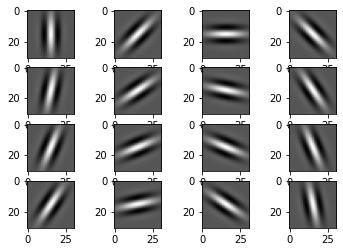

In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Crear un banco de filtros
filters_ejemplo = []
ksize = 31
for theta in np.arange(0, np.pi, np.pi / 16):
    kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters_ejemplo.append(kern)

f, ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(filters_ejemplo[i+j*4], cmap='gray')
plt.show()


### Ejercicio
Comprueba cómo afectan los valores $\sigma$, $\lambda$ y $\gamma$ a la forma de los filtros de Gabor. *Hint*: Copia el código anterior varias veces y prueba con distintos valores de cada parámetro. 

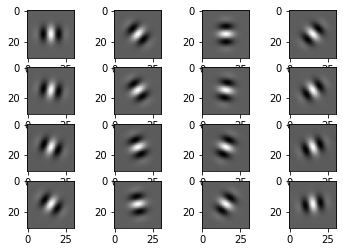

In [3]:
# Se plantea con los valores de 5.0 para desviación típica de la gaussiana, 11.0 para la longitud de onda de la sinusoidal y de 1.5 para la razón de aspecto espacial
filters = []
ksize = 31
for theta in np.arange(0, np.pi, np.pi / 16):
    kern = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 11.0, 1.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters.append(kern)

f, ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(filters[i+j*4], cmap='gray')
plt.show()

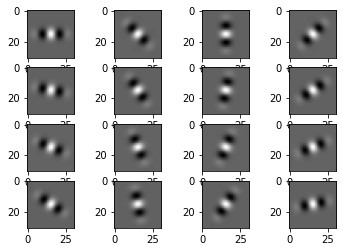

In [4]:
# Se plantea con los valores de 6.0 para desviación típica de la gaussiana, 12.0 para la longitud de onda de la sinusoidal y de 2.5 para la razón de aspecto espacial
filters = []
ksize = 31
for theta in np.arange(0, np.pi, np.pi / 16):
    kern = cv2.getGaborKernel((ksize, ksize), 6.0, theta, 12.0, 2.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters.append(kern)

f, ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(filters[i+j*4], cmap='gray')
plt.show()

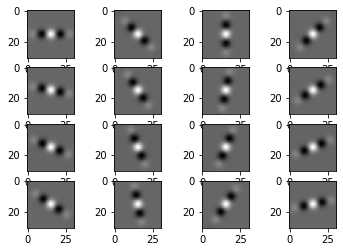

In [5]:
# Se plantea con los valores de 7.0 para desviación típica de la gaussiana, 13.0 para la longitud de onda de la sinusoidal y de 3.5 para la razón de aspecto espacial
filters = []
ksize = 31
for theta in np.arange(0, np.pi, np.pi / 16):
    kern = cv2.getGaborKernel((ksize, ksize), 7.0, theta, 13.0, 3.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters.append(kern)

f, ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(filters[i+j*4], cmap='gray')
plt.show()

#### `Respuesta`: En términos generales, apreciamos que el incremento progresivo en los parámetros afectan a la anchura y definición en el aspecto, pues a medida que se incrementan los valores, los trazos en los filtros son más continuos y claros. Cabe destacar que mediante estos parámetros, podemos modular el vector de características que describa la imagen que estemos analizando, de ahí que se suela emplear un banco de filtros amplios con el fin de centrarse en diversas medidas estadísticas durante el análisis.

El siguiente paso consiste en convolucionar la imagen con cada uno de los filtros del banco y calcular estadísticas sobre el resultado de esta convolución. El conjunto de estas estadísticas obtenido con todos los filtros formará el vector de características de la imagen.

En este ejemplo, utilizaremos la media, la varianza y la entropía de la imagen convolucionada.

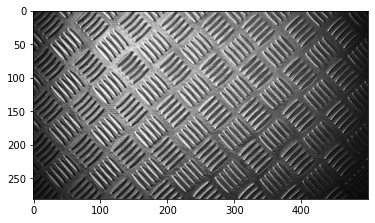

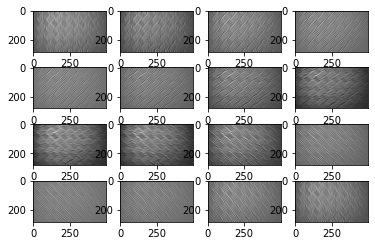

[0.2601184624983299, 0.020166453953378214, 5.181645170163304, 0.26013589501421935, 0.024228081265224268, 5.332163113792397, 0.2601531144428565, 0.05019149770163014, 5.548862719860011, 0.2601623110739631, 0.15795944725508282, 5.72329169534732, 0.26016547278858265, 0.26362348186735907, 5.627363293118668, 0.2601626189389868, 0.17758438277462993, 5.7457561354798194, 0.2601587845189875, 0.05310073162354808, 5.7487481627111565, 0.26015269488153353, 0.02236828683891712, 5.637862966468594, 0.2601511910636448, 0.015884137402441004, 5.643623506614739, 0.2601606800023754, 0.016720571523248354, 5.631219092910095, 0.2601715947074909, 0.027606357093138523, 5.659139323807848, 0.2601719371605207, 0.10962031942895022, 5.488931361634353, 0.26016802501972347, 0.245862754208928, 5.2801927425378565, 0.2601538833513959, 0.2300008563702263, 5.394922226533899, 0.2601410048662449, 0.07348726900455088, 5.5401931053525475, 0.26012445168288695, 0.02632145537933965, 5.270670583861427]


In [6]:
im1 = cv2.imread('res/texture/text1.jpg', cv2.IMREAD_GRAYSCALE)
im1 = im1.astype(float)/255.0 # Normalizar entre 0 y 1

plt.imshow(im1, cmap='gray')
plt.show()

f, ax = plt.subplots(4,4)

feature_vector1 = []
for index,f in enumerate(filters_ejemplo):
    conv = cv2.filter2D(im1, -1, f)
    # Calcular estadísticas para el vector
    mean = np.mean(conv)
    var = np.var(conv)
    feature_vector1.append(mean)
    feature_vector1.append(var)
        
    # Distribucion de colores de la imagen
    histogram, _ = np.histogram(conv, 100)
    # Probabilidades de ocurrencia de cada color
    histogram = histogram.astype(float)/ (conv.shape[0]*conv.shape[1])
    # Formula entropia (eps es un número flotante muy pequeño que se
    # usa para que el logaritmo obtenga valores finitos)
    H = -np.sum(histogram*np.log2(histogram + np.finfo(float).eps))
    feature_vector1.append(H)
    
    # Mostrar resultado convolucion
    row = int(index / 4)
    col = index % 4
    ax[row, col].imshow(conv, cmap='gray')

plt.show()

print(feature_vector1)

fv1 = np.array(feature_vector1)
    

### Ejercicio
Carga las imágenes `res/texture/text3.jpg` y `res/texture/text5.jpg` y obtén sus descriptores de textura como en el ejemplo anterior. Calcula las diferencias entre los descriptores de las tres imágenes. Guardan relación estos valores con las características de las texturas presentes en las imágenes?

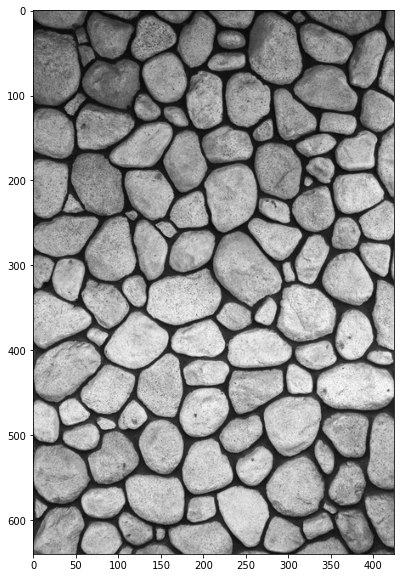

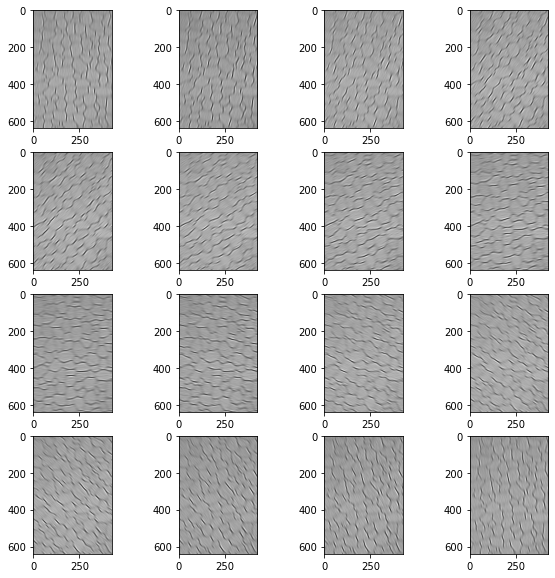

[0.33216018573301653, 0.1038381780717356, 4.678679114872721, 0.3323064623366213, 0.09981640981123627, 4.7359312475415996, 0.3325448739822867, 0.09096430952734416, 4.669587380072496, 0.33269871367153603, 0.07941261386059756, 4.770312596861529, 0.3327567011983604, 0.06704854821201969, 4.7972421654282575, 0.33272936090203276, 0.08131683592776093, 4.743290818444931, 0.33269123333183903, 0.09062163818452658, 4.835741418830455, 0.3326908734555695, 0.09890496758939316, 4.863966154708917, 0.3327408259065242, 0.10399683348874993, 4.75073762938541, 0.332780775327119, 0.09653635206701656, 4.835680375791128, 0.3327602158680131, 0.08638804824661919, 4.743344141314359, 0.33270045563841566, 0.07990192187131534, 4.691555540484261, 0.3326494836741169, 0.07188275052661221, 4.744332509013976, 0.33258274066401283, 0.08766061901564498, 4.6648364255172865, 0.33245828283673406, 0.09514650033877906, 4.793128669526849, 0.33226269382652507, 0.10140076746874128, 4.690328798112284]


In [7]:
# Imagen text3.jpg:
plt.rcParams["figure.figsize"] = [10,10]
text3 = cv2.imread('res/texture/text3.jpg', cv2.IMREAD_GRAYSCALE)
text3 = text3.astype(float)/255.0 # Normalizar entre 0 y 1

plt.imshow(text3, cmap='gray')
plt.show()

f, ax = plt.subplots(4,4)

feature_vector2 = []
for index,f in enumerate(filters_ejemplo):
    conv = cv2.filter2D(text3, -1, f)
    # Calcular estadísticas para el vector
    mean = np.mean(conv)
    var = np.var(conv)
    feature_vector2.append(mean)
    feature_vector2.append(var)
        
    # Distribucion de colores de la imagen
    histogram, _ = np.histogram(conv, 100)
    # Probabilidades de ocurrencia de cada color
    histogram = histogram.astype(float)/ (conv.shape[0]*conv.shape[1])
    # Formula entropia (eps es un número flotante muy pequeño que se
    # usa para que el logaritmo obtenga valores finitos)
    H = -np.sum(histogram*np.log2(histogram + np.finfo(float).eps))
    feature_vector2.append(H)
    
    # Mostrar resultado convolucion
    row = int(index / 4)
    col = index % 4
    ax[row, col].imshow(conv, cmap='gray')

plt.show()

print(feature_vector2)

fv3 = np.array(feature_vector2)

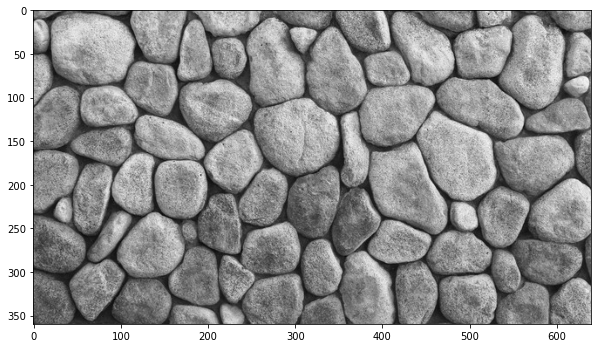

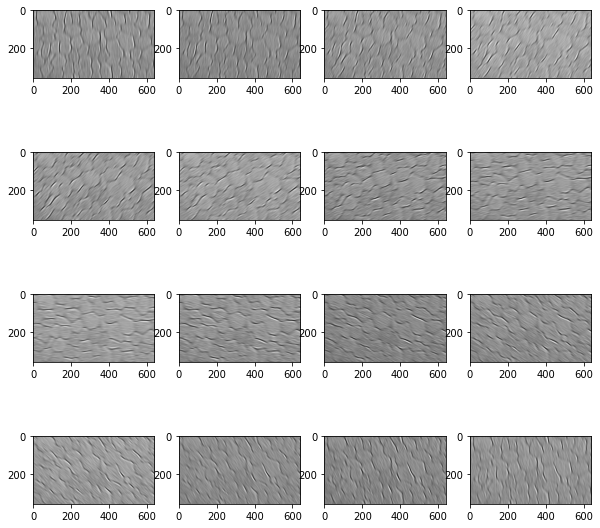

[0.3247752681630539, 0.07151001105135384, 4.797091625288867, 0.32475189866177934, 0.06276256796550199, 4.599578641963181, 0.3247402041964367, 0.05152771066472683, 4.6593972275926445, 0.3247458343970256, 0.0438134463861101, 4.660611870118467, 0.3247646636445314, 0.033708980012129075, 4.7255037207734505, 0.32474365565777025, 0.0347834020951273, 4.6705669380793635, 0.32471727894578944, 0.03805531408266576, 4.731756116115223, 0.32471522140452935, 0.04661458018330663, 4.730006010347856, 0.3247280297263025, 0.05247960639326426, 4.726695159985135, 0.3247359119363048, 0.051964954049533135, 4.840170563076444, 0.3247618524593182, 0.05108319074230301, 4.634326262250908, 0.3247930047123385, 0.048620351545868266, 4.676477569813168, 0.3248387901553462, 0.043063325036052445, 4.678057939233646, 0.32485808846909653, 0.054947225989576486, 4.428041535428989, 0.3248490465818832, 0.06434208391050596, 4.6535116146712765, 0.32481597241929566, 0.070719469169722, 4.642013865866894]


In [9]:
# Imagen text5.jpg:
plt.rcParams["figure.figsize"] = [10,10]
text5 = cv2.imread('res/texture/text5.jpg', cv2.IMREAD_GRAYSCALE)
text5 = text5.astype(float)/255.0 # Normalizar entre 0 y 1

plt.imshow(text5, cmap='gray')
plt.show()

f, ax = plt.subplots(4,4)

feature_vector3 = []
for index,f in enumerate(filters_ejemplo):
    conv = cv2.filter2D(text5, -1, f)
    # Calcular estadísticas para el vector
    mean = np.mean(conv)
    var = np.var(conv)
    feature_vector3.append(mean)
    feature_vector3.append(var)
        
    # Distribucion de colores de la imagen
    histogram, _ = np.histogram(conv, 100)
    # Probabilidades de ocurrencia de cada color
    histogram = histogram.astype(float)/ (conv.shape[0]*conv.shape[1])
    # Formula entropia (eps es un número flotante muy pequeño que se
    # usa para que el logaritmo obtenga valores finitos)
    H = -np.sum(histogram*np.log2(histogram + np.finfo(float).eps))
    feature_vector3.append(H)
    
    # Mostrar resultado convolucion
    row = int(index / 4)
    col = index % 4
    ax[row, col].imshow(conv, cmap='gray')

plt.show()

print(feature_vector3)

fv5 = np.array(feature_vector3)

In [10]:
# Cálculo de las diferencias entre los descriptores de las 3 imágenes:
fv1 = np.array(feature_vector1) #text1
fv3 = np.array(feature_vector2) #text3
fv5 = np.array(feature_vector3) #text5

# Diferencias mediante la determinación de la distancia euclídea:

descriptor1_3 = np.sqrt(fv1 * fv1 + fv3 * fv3)
descriptor1_5 = np.sqrt(fv1 * fv1 + fv5 * fv5)
descriptor3_5 = np.sqrt(fv3 * fv3 + fv5 * fv5)

# Análisis de los resultados obtenidos:
print("La diferencia entre descriptor de imagen 1 e imagen 3 es: ", np.mean(descriptor1_3))
print("La diferencia entre descriptor de imagen 1 e imagen 5 es: ", np.mean(descriptor1_5))
print("La diferencia entre descriptor de imagen 3 e imagen 5 es: ", np.mean(descriptor3_5))

La diferencia entre descriptor de imagen 1 e imagen 3 es:  2.618989779226002
La diferencia entre descriptor de imagen 1 e imagen 5 es:  2.592464013557401
La diferencia entre descriptor de imagen 3 e imagen 5 es:  2.4120112932538293


#### `Respuesta`: Apreciamos en general que las diferencias son mayores entre aquellas imágenes con objetos que presentan mayores espacios entre sí, de ahí la implicación en torno a la textura, donde la diferencia es más acusada. De esta forma, este patrón es el que se observa en las imágenes analizadas.

## Matrices de co-ocurrencia

La librería scikit dispone de métodos para calcular tanto las matrices de co-ocurrencia de una imágen como las propiedades de dicha matriz.

La función `greycomatrix` se utiliza para calcular la matriz de co-ocurrencia. Toma los siguientes parámetros:
- Imagen original
- Lista con las distancias entre los pares de píxeles con los que se calculará la matriz
- Lista con los ángulos en radianes en los que se calculará la matriz
- `normed`: si toma valor `True` los valores de la matriz se normalizan
- `symmetric`: si toma valor `True` la matriz será simétrica, esto es, la combinación de colores *(i,j)* se considera equivalente a *(j,i)*



In [12]:
from skimage.feature import graycomatrix, graycoprops

im = cv2.imread('res/texture/text1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('res/texture/text3.jpg', cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread('res/texture/text5.jpg', cv2.IMREAD_GRAYSCALE)

# Calculamos la matriz de co-ocurrencia con pares de píxeles situados
# a una distancia 1 y 2 y con ángulos de 0, 45, 90 y 135 grados.
cm = graycomatrix(im, [1, 2], [0, np.pi/4, np.pi/2, 3*np.pi/4], normed=True, symmetric=True)

La función `greycoprops` toma como parámetro la matriz de co-ocurrencia calculada con la función anterior y el nombre de la propiedad a calcular:
- `contrast` $\sum_{i,j=0}^{256} P(i,j)(i-j)^2$
- `ASM` $\sum_{i,j=0}^{256} P(i,j)^2$
- `energy` $\sqrt{ASM}$
- `dissimilarity`$\sum_{i,j=0}^{256} P(i,j)|i-j|$
- `homogeneity` $\sum_{i,j=0}^{256} \dfrac{P(i,j)}{1+(i-j)^2}$
- `correlation`$\sum_{i,j=0}^{256} P(i,j) \dfrac{(i-\mu_i)(j-\mu_j)}{\sqrt{\sigma_i^2\sigma_j^2}}$

Esta función devuelve una matriz con las propiedades calculadas. Cada fila de la matriz se corresponde con las propiedades calculadas a cada distancia y cada columna, con las propiedades relativas a un ángulo. Si queremos construir un vector de características debemos concatenar todos los valores calculados a distintas distancias y ángulos en una misma fila.

In [13]:
props = graycoprops(cm, 'contrast')

print("Tamaño matriz propiedades", props.shape, props)

feature_vector = np.reshape(props, (1, props.shape[0]*props.shape[1]))

print("Tamaño vector de características", feature_vector.shape, feature_vector)

Tamaño matriz propiedades (2, 4) [[1382.9078085  1510.03682365 1267.89287143 1756.95588319]
 [3056.62016036 1510.03682365 2847.96480287 1756.95588319]]
Tamaño vector de características (1, 8) [[1382.9078085  1510.03682365 1267.89287143 1756.95588319 3056.62016036
  1510.03682365 2847.96480287 1756.95588319]]


De la misma forma, si queremos que nuestro vector de características esté formado por varias propiedades (contraste, energía...) debemos concatenar las matrices resultado.

### Ejercicio
1) Calcula las matrices de co-ocurrencia de las imágenes `res/texture/text1.jpg`, `res/texture/text3.jpg`  y `res/texture/text5.jpg` con distancias 1,2 y ángulos 0 y 90 grados.

2) Construye los vectores de características de cada una de las imágenes considerando las propiedades contraste y energía. 

3) Calcula las difrencias entre los vectores de características de las imágenes. Son coherentes con la textura presente en las imágenes?

In [14]:
# 1. Cálculo de matrices de co-ocurrencia de text1, text3 y text5 con distancias 1,2 y ángulos 0 y 90 grados:
text_1 = cv2.imread('res/texture/text1.jpg', cv2.IMREAD_GRAYSCALE)
text_3 = cv2.imread('res/texture/text3.jpg', cv2.IMREAD_GRAYSCALE)
text_5 = cv2.imread('res/texture/text5.jpg', cv2.IMREAD_GRAYSCALE)

cm_text_1 = graycomatrix(text_1, [1, 2], [0, np.pi/2], normed=True, symmetric=True)
cm_text_3 = graycomatrix(text_3, [1, 2], [0, np.pi/2], normed=True, symmetric=True)
cm_text_5 = graycomatrix(text_5, [1, 2], [0, np.pi/2], normed=True, symmetric=True)

In [15]:
# 2. Construcción de los vectores de características de cada una de las imágenes considerando las propiedades contraste y energía:
# 2.1 Contraste:
props_contrast_text1 = graycoprops(cm_text_1, 'contrast')
print("Tamaño matriz propiedades (contraste) text1", props_contrast_text1.shape, props_contrast_text1)
feature_vector_text1 = np.reshape(props_contrast_text1, (1, props_contrast_text1.shape[0]*props_contrast_text1.shape[1]))
print("Tamaño vector de características (contraste) text1", feature_vector_text1.shape, feature_vector_text1)

props_contrast_text3 = graycoprops(cm_text_3, 'contrast')
print("Tamaño matriz propiedades (contraste) text3", props_contrast_text3.shape, props_contrast_text3)
feature_vector_text3 = np.reshape(props_contrast_text3, (1, props_contrast_text3.shape[0]*props_contrast_text3.shape[1]))
print("Tamaño vector de características text3", feature_vector_text3.shape, feature_vector_text3)

props_contrast_text5 = graycoprops(cm_text_5, 'contrast')
print("Tamaño matriz propiedades (contraste) text5", props_contrast_text5.shape, props_contrast_text5)
feature_vector_text5 = np.reshape(props_contrast_text5, (1, props_contrast_text5.shape[0]*props_contrast_text5.shape[1]))
print("Tamaño vector de características text5", feature_vector_text5.shape, feature_vector_text5)

Tamaño matriz propiedades (contraste) text1 (2, 2) [[1382.9078085  1267.89287143]
 [3056.62016036 2847.96480287]]
Tamaño vector de características (contraste) text1 (1, 4) [[1382.9078085  1267.89287143 3056.62016036 2847.96480287]]
Tamaño matriz propiedades (contraste) text3 (2, 2) [[361.41747494 347.84848384]
 [899.1285461  864.77130002]]
Tamaño vector de características text3 (1, 4) [[361.41747494 347.84848384 899.1285461  864.77130002]]
Tamaño matriz propiedades (contraste) text5 (2, 2) [[420.60953312 388.68844011]
 [825.1778605  737.48778806]]
Tamaño vector de características text5 (1, 4) [[420.60953312 388.68844011 825.1778605  737.48778806]]


In [16]:
# 2.2 Energía:
props_energy_text1 = graycoprops(cm_text_1, 'energy')
print("Tamaño matriz propiedades (energía) text1", props_energy_text1.shape, props_energy_text1)
feature_vector_energy_text1 = np.reshape(props_energy_text1, (1, props_energy_text1.shape[0]*props_energy_text1.shape[1]))
print("Tamaño vector de características (energía) text1", feature_vector_energy_text1.shape, feature_vector_energy_text1)

props_energy_text3 = graycoprops(cm_text_3, 'energy')
print("Tamaño matriz propiedades (energía) text3", props_energy_text3.shape, props_energy_text3)
feature_vector_energy_text3 = np.reshape(props_energy_text3, (1, props_energy_text3.shape[0]*props_energy_text3.shape[1]))
print("Tamaño vector de características (energía) text3", feature_vector_energy_text3.shape, feature_vector_energy_text3)

props_energy_text5 = graycoprops(cm_text_5, 'energy')
print("Tamaño matriz propiedades (energía) text5", props_energy_text5.shape, props_energy_text5)
feature_vector_energy_text5 = np.reshape(props_energy_text5, (1, props_energy_text5.shape[0]*props_energy_text5.shape[1]))
print("Tamaño vector de características (energía) text5", feature_vector_energy_text5.shape, feature_vector_energy_text5)

Tamaño matriz propiedades (energía) text1 (2, 2) [[0.00891368 0.00895919]
 [0.00741864 0.00742612]]
Tamaño vector de características (energía) text1 (1, 4) [[0.00891368 0.00895919 0.00741864 0.00742612]]
Tamaño matriz propiedades (energía) text3 (2, 2) [[0.01157202 0.01139366]
 [0.00984652 0.00965915]]
Tamaño vector de características (energía) text3 (1, 4) [[0.01157202 0.01139366 0.00984652 0.00965915]]
Tamaño matriz propiedades (energía) text5 (2, 2) [[0.01006242 0.01021474]
 [0.0088759  0.0090397 ]]
Tamaño vector de características (energía) text5 (1, 4) [[0.01006242 0.01021474 0.0088759  0.0090397 ]]


In [17]:
# 3. Cálculo de las diferencias entre los vectores de características de las imágenes:

# 3.1 Contraste:
diferencia1_3 = np.sqrt(feature_vector_text1 * feature_vector_text1 + feature_vector_text3 * feature_vector_text3)
diferencia1_5 = np.sqrt(feature_vector_text1 * feature_vector_text1 + feature_vector_text5 * feature_vector_text5)
diferencia3_5 = np.sqrt(feature_vector_text3 * feature_vector_text3 + feature_vector_text5 * feature_vector_text5)

# Análisis de los resultados obtenidos:
print("La diferencia entre los vectores de características (contraste) de la imagen 1 e imagen 3 es: ", np.mean(diferencia1_3))
print("La diferencia entre los vectores de características (contraste) de la imagen 1 e imagen 5 es: ", np.mean(diferencia1_5))
print("La diferencia entre los vectores de características (contraste) de la imagen 3 e imagen 5 es: ", np.mean(diferencia3_5))

La diferencia entre los vectores de características (contraste) de la imagen 1 e imagen 3 es:  2226.645266974295
La diferencia entre los vectores de características (contraste) de la imagen 1 e imagen 5 es:  2219.8848641148793
La diferencia entre los vectores de características (contraste) de la imagen 3 e imagen 5 es:  858.2739339398873


In [18]:
# 3.2 Energía:
diferencia_energía_1_3 = np.sqrt(feature_vector_energy_text1 * feature_vector_energy_text1 + feature_vector_energy_text3 * feature_vector_energy_text3)
diferencia_energía_1_5 = np.sqrt(feature_vector_energy_text1 * feature_vector_energy_text1 + feature_vector_energy_text5 * feature_vector_energy_text5)
diferencia_energía_3_5 = np.sqrt(feature_vector_energy_text3 * feature_vector_energy_text3 + feature_vector_energy_text5 * feature_vector_energy_text5)

# Análisis de los resultados obtenidos:
print("La diferencia entre los vectores de características (energía) de la imagen 1 e imagen 3 es: ", np.mean(diferencia_energía_1_3))
print("La diferencia entre los vectores de características (energía) de la imagen 1 e imagen 5 es: ", np.mean(diferencia_energía_1_5))
print("La diferencia entre los vectores de características (energía) de la imagen 3 e imagen 5 es: ", np.mean(diferencia_energía_3_5))

La diferencia entre los vectores de características (energía) de la imagen 1 e imagen 3 es:  0.01340338598179633
La diferencia entre los vectores de características (energía) de la imagen 1 e imagen 5 es:  0.0125741440576528
La diferencia entre los vectores de características (energía) de la imagen 3 e imagen 5 es:  0.014280773796497948


## Local binary patterns
La función `local_binary_pattern` de la librería scikit permite calcular el descriptor LBP sobre una imagen. Toma como parámetros la imagen sobre la que se quiere calcular el descriptor, el número de vecinos utilizados para el cálculo y el radio del círculo en el que se calculará el descriptor. La salida de la función es una matriz en la que cada posición contiene en valor calculado por el algoritmo lbp teniendo en cuenta los vecinos y el radio especificado. 

In [19]:
from skimage.feature import local_binary_pattern

im_1 = cv2.imread('res/texture/text1.jpg', cv2.IMREAD_GRAYSCALE)

lbp = local_binary_pattern(im_1, 8, 5)


El siguiente paso consiste en calcular el histograma de los valores lbp calculados. Este histograma se utilizará como vector de características.

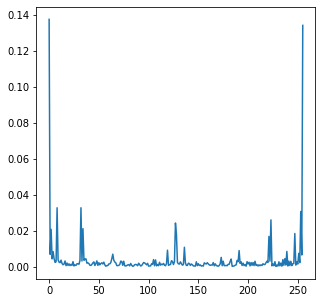

In [20]:
# Con el parámetro density=True la función np.histogram devuelve el histograma
# normalizado entre 0 y 1
plt.rcParams["figure.figsize"] = [5,5]
histogram, _  = np.histogram(lbp, 256, density=True) 
bins = np.arange(0,256)
plt.plot(bins, histogram)
plt.show()

### Ejercicio
1) Calcula los histogramas de los descriptores lbp de las imágenes `res/texture/text3.jpg`  y `res/texture/text5.jpg`

2) Calcula las diferencias entre los histogramas de las imágenes `res/texture/text1.jpg`, `res/texture/text3.jpg`  y `res/texture/text5.jpg`. Existen diferencias significativas entre las imágenes con distinta textura?

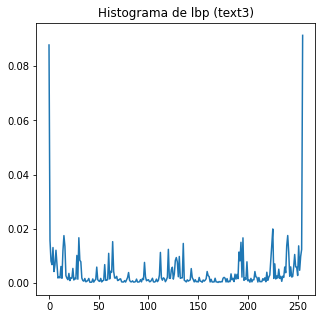

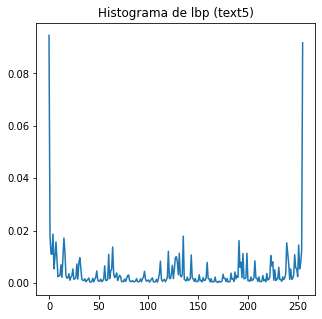

In [21]:
# 1.) Cálculo de los histogramas lbp en las imágenes text3 y text5:
im_3 = cv2.imread('res/texture/text3.jpg', cv2.IMREAD_GRAYSCALE)
im_5 = cv2.imread('res/texture/text5.jpg', cv2.IMREAD_GRAYSCALE)

lbp_3 = local_binary_pattern(im_3, 8, 5)
lbp_5 = local_binary_pattern(im_5, 8, 5)

histogram_3, _  = np.histogram(lbp_3, 256, density=True) 
bins = np.arange(0,256)
plt.plot(bins, histogram_3)
plt.title('Histograma de lbp (text3)')
plt.show()

histogram_5, _  = np.histogram(lbp_5, 256, density=True) 
plt.plot(bins, histogram_5)
plt.title('Histograma de lbp (text5)')
plt.show()

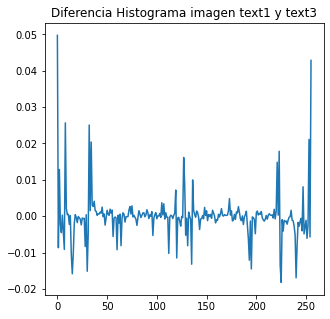

In [22]:
# 2.) Cálculo de las diferencias, mediante la distancia euclídea, entre los histogramas de las imágenes text1, text3 y text5:

# Diferencias histogramas imagen text1 y text3:
histograma_d13 = histogram - histogram_3
plt.plot(bins, histograma_d13)
plt.title('Diferencia Histograma imagen text1 y text3')
plt.show()

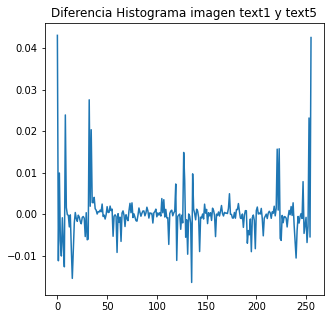

In [23]:
# Diferencias histogramas imagen text1 y text5:
histograma_d15 = histogram - histogram_5
plt.plot(bins, histograma_d15)
plt.title('Diferencia Histograma imagen text1 y text5')
plt.show()

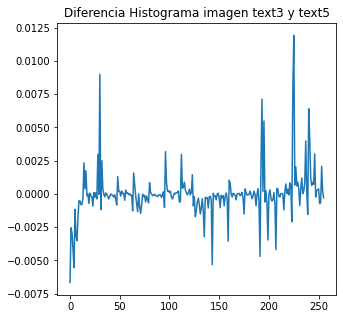

In [24]:
# Diferencias histogramas imagen text3 y text5:
plt.rcParams["figure.figsize"] = [5,5]

histograma_d35 = histogram_3 - histogram_5
plt.plot(bins, histograma_d35)
plt.title('Diferencia Histograma imagen text3 y text5')
plt.show()


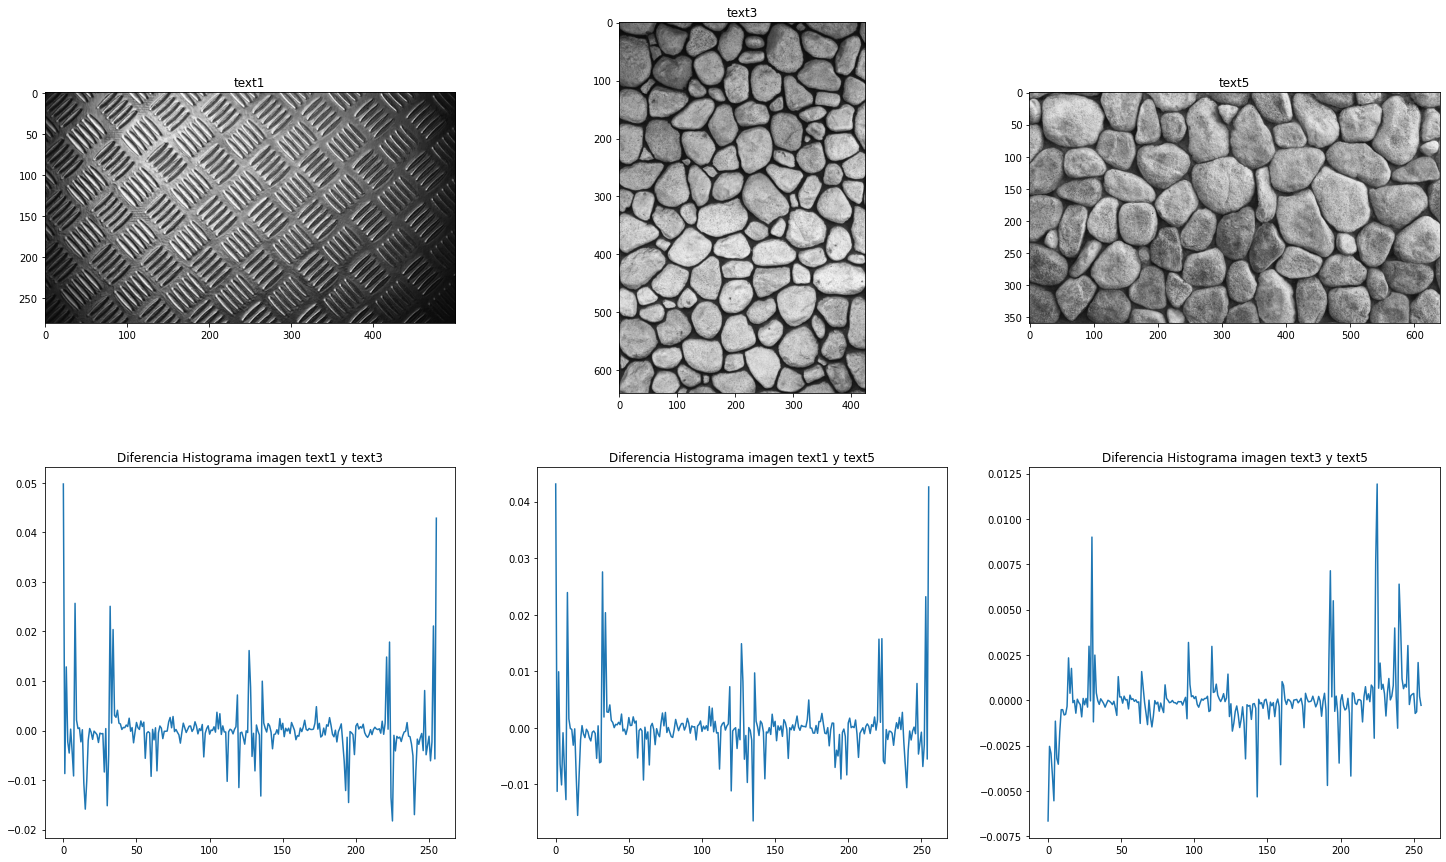

In [25]:
# Visualización global de resultados:

# Imágenes analizadas:
plt.rcParams["figure.figsize"] = [25,15]
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(im, cmap='gray')
axarr[0,0].set_title('text1')
axarr[0,1].imshow(im_3, cmap='gray')
axarr[0,1].set_title('text3')
axarr[0,2].imshow(im_5, cmap='gray')
axarr[0,2].set_title('text5')
axarr[1,0].plot(bins, histograma_d13)
axarr[1,0].set_title('Diferencia Histograma imagen text1 y text3')
axarr[1,1].plot(bins, histograma_d15)
axarr[1,1].set_title('Diferencia Histograma imagen text1 y text5')
axarr[1,2].plot(bins, histograma_d35)
axarr[1,2].set_title('Diferencia Histograma imagen text3 y text5')
plt.show()

#### `Respuesta`: En términos generales, se puede apreciar que para aquellas imágenes que presentan una mayor similitud en textura, la diferencia de los histogramas muestra una tendencia de mayor proximidad en los picos correspondientes a una mayor frecuencia de determinados píxeles.

#### Si tenemos en cuenta el fundamento del Local Binary Patterns, esto coincide con lo esperado, pues hay una clara influencia de la distribución de elementos en la imagen, del vecindario en la consideración de píxeles y de las regiones constituidas. 

#### Por tanto, atendiendo a los rangos de frecuencia de píxeles, podemos ver la mayor magnitud de diferencias al comparar las imágenes text1 y text3 (-0.02, 0.05) y las imágenes text1 y text5 (-0.01, 0.04) frente a la comparación entre text3 y text5 (-0.0075 y 0.0125).